In [345]:
import pandas as pd
import os

#### Merge 12 Month Sale data into one Df

In [346]:
dir_path = "Downloads\Python_Pandas\Project_1_Sales\Sales_Data"
all_month_df = pd.DataFrame()

for files in os.listdir(dir_path):
      df_for_each_file = pd.read_csv(os.path.join(dir_path,files))
      all_month_df = pd.concat([all_month_df,df_for_each_file])

all_month_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [347]:
all_month_df.to_csv("all_data.csv",index= False)

#### Create DF for all Month Data

In [348]:
all_data_df = pd.read_csv("all_data.csv")
all_data_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Q1 --> What was the best month for sales? How much was earned that month?

#### Task 1 --> Add Month Column 

In [349]:
all_data_df['Month'] = all_data_df['Order Date'].str[0:2]

In [350]:
all_data_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


#### Clean up Data

In [351]:
all_data_df['Month'].unique()

array(['04', nan, '05', 'Or', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

### Drop NAN Rows

In [352]:
nan_df = all_data_df[all_data_df.isna().any(axis=1)]
nan_df.head()

all_data_df = all_data_df.dropna(how='all')

#### Drop rows with Month as "or"

In [353]:
filt = all_data_df['Month'] != 'Or'
all_data_df = all_data_df.loc[filt]

#### Convert all Data Types to perform aggregation

In [354]:
all_data_df['Month']= all_data_df['Month'].astype(int)

In [355]:
all_data_df['Quantity Ordered'] = all_data_df['Quantity Ordered'].astype(int)

In [356]:
all_data_df['Price Each'] = all_data_df['Price Each'].astype(float)

In [357]:
all_data_df['Total Sale'] = all_data_df['Quantity Ordered'] * all_data_df['Price Each']

In [358]:
all_data_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sale
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


#### Find out same for each Month

In [359]:
 all_data_df.groupby('Month').sum()

,Quantity Ordered,Price Each,Total Sale
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [360]:
results = all_data_df.groupby('Month').sum()

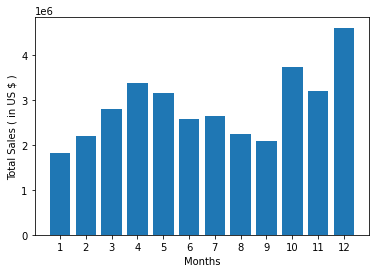

In [361]:
import matplotlib.pyplot as plt

month = range(1,13)
plt.bar(month,results['Total Sale'])
plt.xticks(month) 
plt.xlabel("Months")
plt.ylabel("Total Sales ( in US $ )")
plt.show()

#### Q2 --> What city sold the most product?

In [362]:
all_data_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sale
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


#### Add City attribute into DF using purchase address

In [363]:
all_data_df['City'] = all_data_df['Purchase Address'].str.split(',').str[1] + '(' + all_data_df['Purchase Address'].str.split(',').str[2].str[1:3] + ')'

In [364]:
all_data_df.groupby('City').sum()

,Quantity Ordered,Price Each,Month,Total Sale
City,,,,
Atlanta(GA),16602,2.779908e+06,104794,2.795499e+06
Austin(TX),11153,1.809874e+06,69829,1.819582e+06
Boston(MA),22528,3.637410e+06,141112,3.661642e+06
Dallas(TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles(CA),33289,5.421435e+06,208325,5.452571e+06
New York City(NY),27932,4.635371e+06,175741,4.664317e+06
Portland(ME),2750,4.471893e+05,17144,4.497583e+05
Portland(OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco(CA),50239,8.211462e+06,315520,8.262204e+06


In [365]:
results = all_data_df.groupby('City').sum()

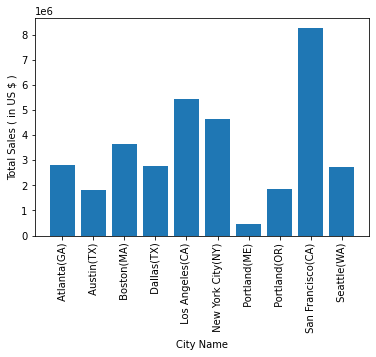

In [366]:
cities = []
for city , pd in all_data_df.groupby('City') : 
    cities.append(city)

plt.bar(cities,results['Total Sale'])
plt.xticks(cities,rotation= 'vertical')  
plt.xlabel("City Name")
plt.ylabel("Total Sales ( in US $ )")
plt.show() 


#### Q3 --> What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [369]:
import pandas as pd
all_data_df['Order Date'] = pd.to_datetime( all_data_df['Order Date'] )

In [371]:
all_data_df['Hour'] = all_data_df['Order Date'].dt.hour

In [373]:
all_data_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sale,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9


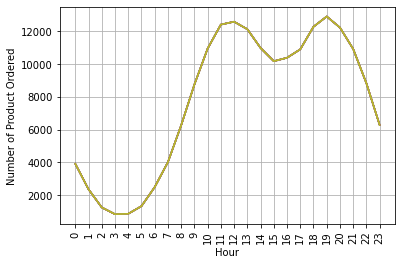

In [383]:
 
Hours = []
for Hour , pd in all_data_df.groupby('Hour') : 
    Hours.append(Hour)

plt.plot(Hours, all_data_df.groupby('Hour').count())
plt.xticks(Hours,rotation= 'vertical')  
plt.xlabel("Hour")
plt.ylabel("Number of Product Ordered")
plt.grid()
plt.show() 

#### Q4 --> What products are most often sold together?

##### Find out orders that has more than one product in it

In [437]:
filt = all_data_df['Order ID'].duplicated(keep=False)
temp_df = all_data_df.loc[filt]
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sale,City,Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles(CA),19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston(MA),11
...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta(GA),20
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta(GA),0
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta(GA),0
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco(CA),13


#### Copy Order ID details into a new column and Make Order ID as index to apply grouping On product and concatenate using apply Function

In [439]:
temp_df['Order Id Details'] = temp_df['Order ID']

<ipython-input-439-fdc16c6605ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Order Id Details'] = temp_df['Order ID']


In [440]:
temp_df.set_index('Order ID',inplace=True)

In [441]:
temp_df['Group Products'] = temp_df.groupby('Order ID')['Product'].apply(','.join)

<ipython-input-441-e8ec2d3d2760>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Group Products'] = temp_df.groupby('Order ID')['Product'].apply(','.join)


In [442]:
temp_df = temp_df.drop_duplicates(['Order Id Details','Group Products'], keep="last")

In [448]:
temp_df[['Order Id Details','Group Products']]

,Order Id Details,Group Products
Order ID,,
176560,176560,"Google Phone,Wired Headphones"
176574,176574,"Google Phone,USB-C Charging Cable"
176585,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
176586,176586,"AAA Batteries (4-pack),Google Phone"
176672,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
259296,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
259297,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
259303,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"


#### Find the combination of 2 products are most often sold together

In [454]:
from collections import Counter
from itertools import combinations

In [456]:
count = Counter()
for row in temp_df['Group Products']:
    sub_list = row.split(',')
    count.update(Counter(combinations(sub_list,2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

#### Q5 --> What product sold the most? Why do you think it sold the most?

In [460]:
results = all_data_df.groupby('Product').sum()
results

,Quantity Ordered,Price Each,Month,Total Sale,Hour
Product,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815


#### find average prrice of each prodcut to Relate Quantity vs Price relationship

In [465]:
price = all_data_df.groupby('Product').mean()
price['Price Each']

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

#### Plot relationship between Price and number of product sold

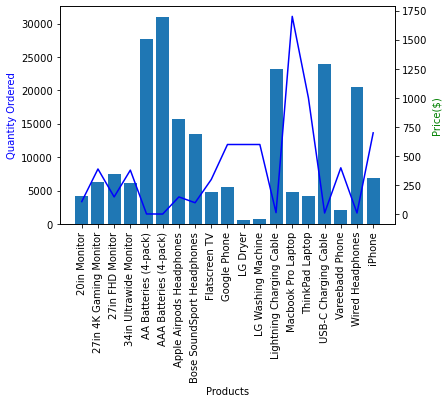

In [477]:
products = []
for product , pd in all_data_df.groupby('Product') : 
    products.append(product)

fig , ax1 = plt.subplots()
ax2 = ax1.twinx() 

ax1.bar(products, results['Quantity Ordered'] )
ax2.plot(products, price['Price Each'],'b-' )

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered',color = 'b')
ax2.set_ylabel('Price($)',color = 'g')
ax1.set_xticklabels(products,rotation='vertical')
plt.show() 